In [47]:
# 导包
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import rand_score, adjusted_rand_score

In [48]:
# 制作数据集
X, y = make_blobs(
    n_samples=500,  # 样本数量
    n_features=2,  # 特征数量
    centers=4,  # 簇数量
    cluster_std=1,  # 簇内标准差
    center_box=(-10.0, 10.0),  # 中心点的边界
    shuffle=True,  # 是否打乱
    random_state=1,  # 随机种子
)

In [50]:
# 簇的数量
range_n_clusters = [2, 3, 4, 5, 6]

silhouette_values_list = [] #   轮廓系数列表
rmsstd_values_list = [] #   RMSSTD列表
nmi_values_list = []    #   NMI列表
rand_index_values_list = [] #   rand_index列表
adjusted_rand_index_values_list = []    #  adjusted_rand_index列表

for n_clusters in range_n_clusters:
    # 使用n_clusters值和随机生成器种子2023初始化聚类器以获得可重复性。
    clusterer = KMeans(
        n_clusters=n_clusters, init="k-means++", n_init="auto", random_state=1
    )  # 初始化聚类器

    cluster_labels = clusterer.fit_predict(X)  # 训练并预测

    # 内部评估指标
    # 轮廓系数（silhouette_score）为所有样本计算平均值，它反映了形成簇的密度和分离程度
    silhouette_avg = silhouette_score(X, cluster_labels)
    # 计算每个样本的轮廓系数
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    # 将轮廓系数和簇数量组成元组，添加到列表中
    silhouette_values_list.append((silhouette_avg, n_clusters))

    # 获取簇中心
    cluster_centers = clusterer.cluster_centers_
    # 计算每个数据点到簇中心的平方距离
    squared_distances = np.sum((X[:, np.newaxis] - cluster_centers[clusterer.labels_]) ** 2, axis=1)
    # 计算RMSSTD
    rmsstd = np.sqrt(np.mean(squared_distances))
    rmsstd_values_list.append((rmsstd, n_clusters))
    
    # 外部评估指标
    # 计算NMI
    nmi = normalized_mutual_info_score(y, cluster_labels)
    nmi_values_list.append((nmi, n_clusters))
    # 计算rand_index
    rand_index = rand_score(y, cluster_labels)
    rand_index_values_list.append((rand_index, n_clusters))
    # 计算adjusted_rand_index
    adjusted_rand_index = adjusted_rand_score(y, cluster_labels)
    adjusted_rand_index_values_list.append((adjusted_rand_index, n_clusters))



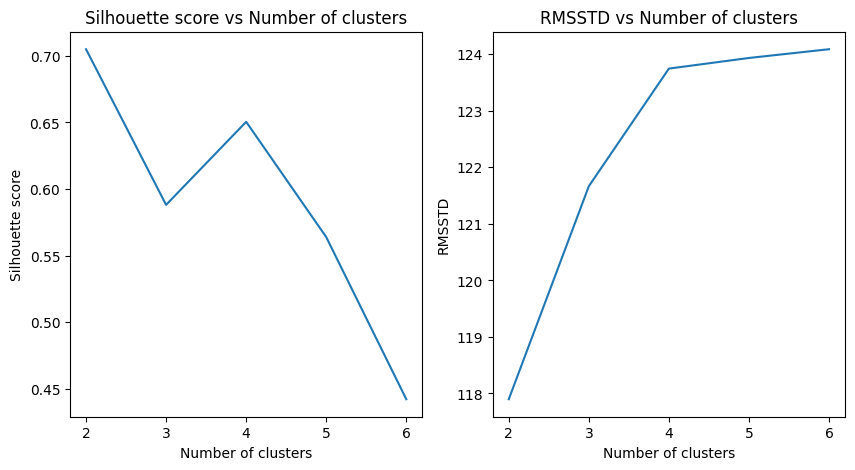

In [51]:
# 创建1行2列的子图布局
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 绘制轮廓系数图像
axs[0].plot([item[1] for item in silhouette_values_list], [item[0] for item in silhouette_values_list])
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('Silhouette score')
axs[0].set_title('Silhouette score vs Number of clusters')

# 绘制RMSSTD图像
axs[1].plot([item[1] for item in rmsstd_values_list], [item[0] for item in rmsstd_values_list])
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('RMSSTD')
axs[1].set_title('RMSSTD vs Number of clusters')

# 显示图像
plt.show()

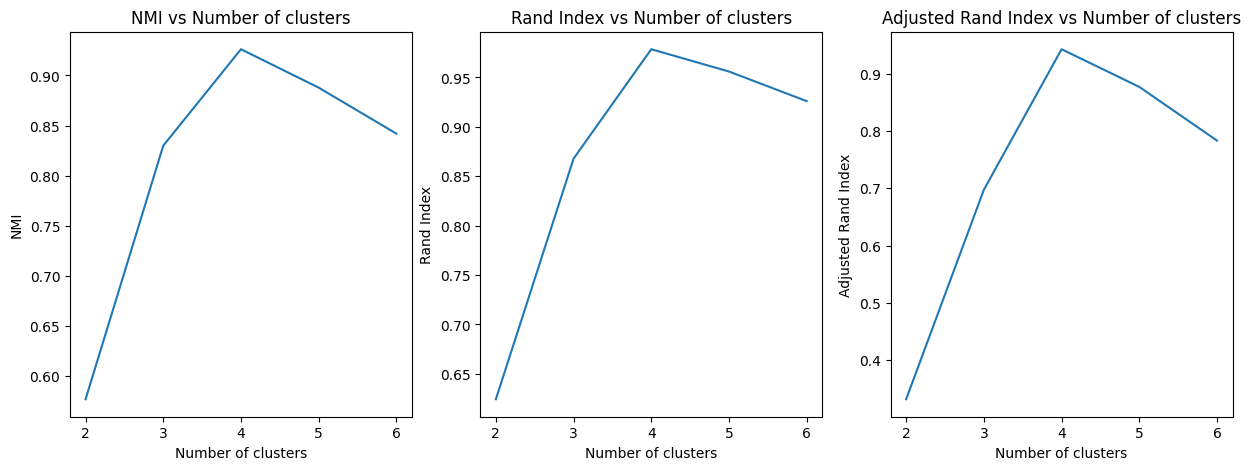

In [52]:
# 创建1行3列的子图
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 绘制nmi图像
axs[0].plot([item[1] for item in nmi_values_list], [item[0] for item in nmi_values_list])
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('NMI')
axs[0].set_title('NMI vs Number of clusters')

# 绘制rand_index图像
axs[1].plot([item[1] for item in rand_index_values_list], [item[0] for item in rand_index_values_list])
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Rand Index')
axs[1].set_title('Rand Index vs Number of clusters')

# 绘制adjusted_rand_index图像
axs[2].plot([item[1] for item in adjusted_rand_index_values_list], [item[0] for item in adjusted_rand_index_values_list])
axs[2].set_xlabel('Number of clusters')
axs[2].set_ylabel('Adjusted Rand Index')
axs[2].set_title('Adjusted Rand Index vs Number of clusters')

# 显示图形
plt.show()